In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [10]:
schema = {
    # --- strings ------------------------------------------------------------
    "location":      "string",
    "type":          "string",
    "block":         "string",
    "street":        "string",
    "storey_range":  "string",   
    "flat_model":     "string",

    # --- numerics -----------------------------------------------------------
    "area_sqm":      "float64",
    "price":         "float64", 
    "commence_date": "Int64",   
    "Quantity_Index":"Int64",
}

In [11]:
data = pd.read_csv("../data.csv", parse_dates=["date"], dtype=schema, usecols=range(11))
data.dtypes

date             datetime64[ns]
location         string[python]
type             string[python]
block            string[python]
street           string[python]
storey_range     string[python]
area_sqm                float64
flat_model       string[python]
commence_date             Int64
Quality_Index             int64
price                   float64
dtype: object

In [12]:
features = ["area_sqm", "commence_date"]
df = data.dropna(subset=features + ["price"]).copy()

X = df[features]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_features = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64,  activation="relu"),
    keras.layers.Dense(1)                    # linear output for regression
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",                               # training target
    metrics=["mse", "mae"]                    
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.20,
    epochs=1_000,
    batch_size=512,
    verbose=2
)

test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)[1:]  # loss is index 0
print(f"\nTest MSE : {test_mse:.2f}")
print(f"Test MAE : {test_mae:.2f}")

y_pred = model.predict(X_test, batch_size=256).squeeze()


I0000 00:00:1750145484.513592   85770 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750145484.609320   85770 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750145484.617630   85770 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750145484.623044   85770 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,985 (164.00 KB)

 Trainable params: 41,985 (164.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


I0000 00:00:1750145485.682154   85962 service.cc:146] XLA service 0x7a3ffc01e4e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750145485.682170   85962 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-06-17 15:31:25.695041: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-17 15:31:25.756695: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90501
2025-06-17 15:31:27.027191: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_377', 168 bytes spill stores, 168 bytes spill loads

2025-06-17 15:31:27.125887: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in f

384/384 - 7s - 18ms/step - loss: 23808788480.0000 - mae: 117218.3906 - mse: 23808788480.0000 - val_loss: 11628246016.0000 - val_mae: 85780.2500 - val_mse: 11628246016.0000
Epoch 2/1000
384/384 - 0s - 1ms/step - loss: 11118603264.0000 - mae: 83984.5000 - mse: 11118603264.0000 - val_loss: 10467937280.0000 - val_mae: 80979.7422 - val_mse: 10467937280.0000
Epoch 3/1000
384/384 - 0s - 858us/step - loss: 9025923072.0000 - mae: 75261.9844 - mse: 9025923072.0000 - val_loss: 7136110080.0000 - val_mae: 66548.1328 - val_mse: 7136110080.0000
Epoch 4/1000
384/384 - 1s - 2ms/step - loss: 6659324416.0000 - mae: 63228.9180 - mse: 6659324416.0000 - val_loss: 6588713472.0000 - val_mae: 62445.1836 - val_mse: 6588713472.0000
Epoch 5/1000
384/384 - 0s - 814us/step - loss: 6578304000.0000 - mae: 62482.1055 - mse: 6578304000.0000 - val_loss: 6597025280.0000 - val_mae: 63248.4727 - val_mse: 6597025280.0000
Epoch 6/1000
384/384 - 0s - 775us/step - loss: 6574717440.0000 - mae: 62479.6445 - mse: 6574717440.0000 

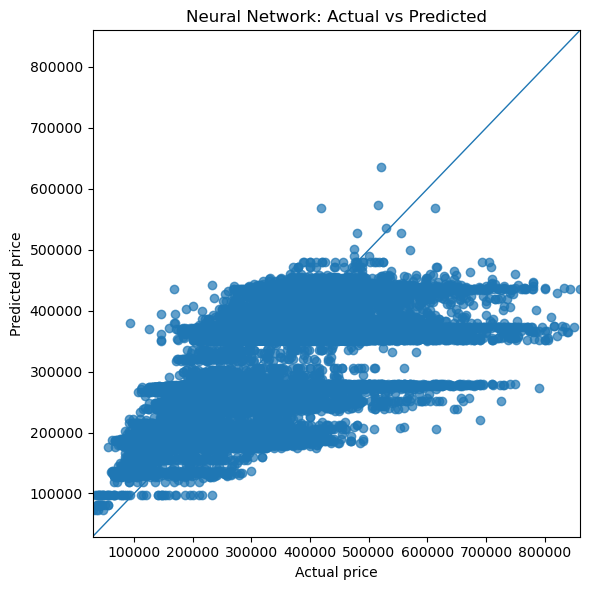

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Neural Network: Actual vs Predicted")

plt.tight_layout()
plt.show()

In [15]:
num_cols = ["area_sqm", "commence_date"]            # numeric predictors
cat_cols = ["location", "type", "block",
            "street", "storey_range", "flat_model"]  # categoricals

df = data.copy()
df = df.dropna(subset=num_cols + cat_cols + ["price"])

X = df[num_cols + cat_cols]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_features = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64,  activation="relu"),
    keras.layers.Dense(1)                    # linear output for regression
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",                               # training target
    metrics=["mse", "mae"]                    
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.20,
    epochs=1_000,
    batch_size=512,
    verbose=2
)

test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)[1:]  # loss is index 0
print(f"\nTest MSE : {test_mse:.2f}")
print(f"Test MAE : {test_mae:.2f}")

y_pred = model.predict(X_test, batch_size=256).squeeze()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       656,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 697,345 (2.66 MB)

 Trainable params: 697,345 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


2025-06-17 15:40:47.413058: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_377', 300 bytes spill stores, 308 bytes spill loads



282/282 - 7s - 24ms/step - loss: 31787085824.0000 - mae: 136978.3125 - mse: 31787085824.0000 - val_loss: 11726001152.0000 - val_mae: 86343.1172 - val_mse: 11726001152.0000
Epoch 2/1000
282/282 - 1s - 3ms/step - loss: 11376997376.0000 - mae: 84904.7109 - mse: 11376997376.0000 - val_loss: 11039008768.0000 - val_mae: 83452.8438 - val_mse: 11039008768.0000
Epoch 3/1000
282/282 - 1s - 3ms/step - loss: 10487953408.0000 - mae: 81426.3281 - mse: 10487953408.0000 - val_loss: 9769963520.0000 - val_mae: 78557.1875 - val_mse: 9769963520.0000
Epoch 4/1000
282/282 - 1s - 3ms/step - loss: 8417405440.0000 - mae: 72461.3438 - mse: 8417405440.0000 - val_loss: 6719444480.0000 - val_mae: 64809.7266 - val_mse: 6719444480.0000
Epoch 5/1000
282/282 - 1s - 3ms/step - loss: 6292063744.0000 - mae: 61391.0742 - mse: 6292063744.0000 - val_loss: 6016460288.0000 - val_mae: 59797.8984 - val_mse: 6016460288.0000
Epoch 6/1000
282/282 - 1s - 3ms/step - loss: 6060668416.0000 - mae: 59854.6016 - mse: 6060668416.0000 - va

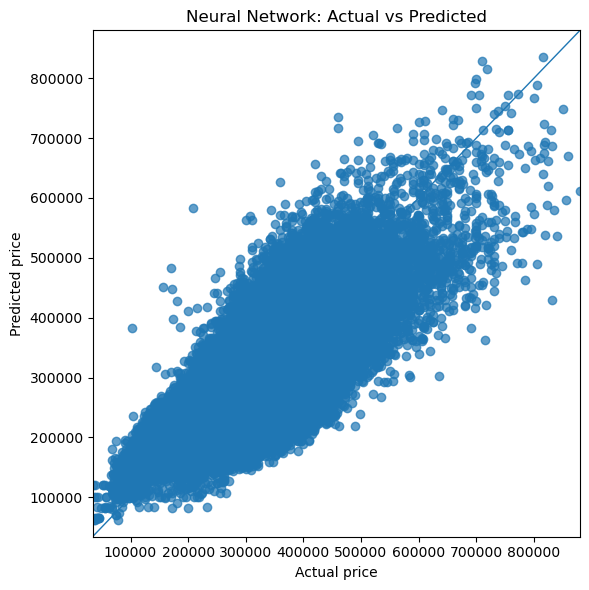

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Neural Network: Actual vs Predicted")

plt.tight_layout()
plt.show()